## Import Libraries

In [132]:
#!pip install plotly
#!pip install pandas
#!pip install numpy
#pip install matplotlib
#pip install seaborn
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [133]:
data= pd.read_csv('startup1.csv')
data 

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [134]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [135]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


## Data Information

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [137]:
data.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

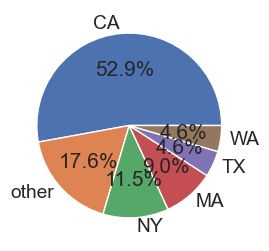

In [138]:

data['state'] = 'other' 
data.loc[(data['state_code']=='CA'), 'state'] = 'CA'
data.loc[(data['state_code'] == 'NY'), 'state'] = 'NY'
data.loc[(data['state_code'] =='MA'), 'state'] = 'MA' 
data.loc[(data['state_code'] == 'TX'), 'state'] = 'TX'
data.loc[(data['state_code'] == 'WA'), 'state'] = 'WA'
state_count = data['state'].value_counts()
plt.pie(state_count, labels = state_count.index, autopct = '%1.1f%%')
plt.show()

## Numeric data

In [139]:
numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data_num=data.select_dtypes(include=numeric)
data_num.head()

,Unnamed: 0,latitude,longitude,labels,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,...,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
0,1005,42.358880,-71.056820,1,2.2493,3.0027,4.6685,6.7041,3,3,...,0,1,0,1,0,0,0,0,1.0000,0
1,204,37.238916,-121.973718,1,5.1260,9.9973,7.0055,7.0055,9,4,...,0,0,1,0,0,1,1,1,4.7500,1
2,1001,32.901049,-117.192656,1,1.0329,1.0329,1.4575,2.2055,5,1,...,0,0,0,0,1,0,0,0,4.0000,1
3,738,37.320309,-122.050040,1,3.1315,5.3151,6.0027,6.0027,5,3,...,0,0,0,0,0,1,1,1,3.3333,1
4,1002,37.779281,-122.419236,0,0.0000,1.6685,0.0384,0.0384,2,2,...,0,0,1,1,0,0,0,0,1.0000,1


## Categorical Data

In [140]:
data_cat=data.select_dtypes(include='object')
data_cat.head()


,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,state_code.1,category_code,object_id,status,state
0,CA,92101,c:6669,San Diego,NaN,Bandsintown,1/1/2007,NaN,4/1/2009,1/1/2010,CA,music,c:6669,acquired,CA
1,CA,95032,c:16283,Los Gatos,NaN,TriCipher,1/1/2000,NaN,2/14/2005,12/28/2009,CA,enterprise,c:16283,acquired,CA
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,NaN,3/30/2010,3/30/2010,CA,web,c:65620,acquired,CA
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,NaN,2/17/2005,4/25/2007,CA,software,c:42668,acquired,CA
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,CA,games_video,c:65806,closed,CA


## Changing 'status' data value

In [141]:
data['status'] = data.status.map({'acquired':1, 'closed':0})

In [142]:
data['status'].astype(int)

0      1
1      1
2      1
3      1
4      0
      ..
918    1
919    0
920    0
921    1
922    1
Name: status, Length: 923, dtype: int64

### Drop column labels

In [143]:
#labels status check similarity
for index, row in data.iterrows():
    if row['labels']!=row['status']:
        print(index, row['labels'], row['status'])

In [144]:
#drop feature
data.drop(["labels"], axis=1, inplace=True)

### Statistical Analysis

In [145]:
de_Num = data.describe(include =['float64', 'int64', 'float', 'int'])

In [146]:
import matplotlib as plt
de_Num.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


In [147]:
de_NumCat = data.describe(include=["O"])

In [148]:
de_NumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,1/1/2003,55
closed_at,335,202,6/1/2013,25
first_funding_at,923,585,1/1/2008,18
last_funding_at,923,680,1/1/2008,11


## Categorical Value Counting

In [149]:
cats = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status']
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom state_code:
state_code
CA    488
NY    106
MA     83
WA     42
TX     42
CO     19
IL     18
PA     17
VA     13
GA     11
NC      7
OR      7
NJ      7
MD      7
FL      6
OH      6
MN      5
CT      4
DC      4
UT      3
TN      3
RI      3
MI      3
KY      2
ME      2
NH      2
MO      2
IN      2
NV      2
AZ      2
WV      1
NM      1
ID      1
AR      1
WI      1
Name: count, dtype: int64

Value count kolom zip_code:
zip_code
94107    30
94105    23
95054    20
94103    19
94043    18
         ..
75244     1
2466      1
85284     1
43607     1
92008     1
Name: count, Length: 382, dtype: int64

Value count kolom id:
id
c:28482    2
c:3949     1
c:26702    1
c:6669     1
c:16283    1
          ..
c:21343    1
c:41747    1
c:31549    1
c:33198    1
c:17884    1
Name: count, Length: 922, dtype: int64

Value count kolom city:
city
San Francisco    128
New York          91
Mountain View     47
Palo Alto         35
Austin            27
                ... 
Idaho Fall

### Handling Missing Values

In [150]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(data.isna().sum()/len(data)*100)
null = null[null["% Missing Values"] > 0]
#print(null)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)

,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [151]:
# Checking Missing Values Column
data[["Unnamed: 6", "closed_at", "age_first_milestone_year", "age_last_milestone_year", "state_code.1", "status"]].head()

,Unnamed: 6,closed_at,age_first_milestone_year,age_last_milestone_year,state_code.1,status
0,NaN,NaN,4.6685,6.7041,CA,1
1,NaN,NaN,7.0055,7.0055,CA,1
2,San Diego CA 92121,NaN,1.4575,2.2055,CA,1
3,Cupertino CA 95014,NaN,6.0027,6.0027,CA,1
4,San Francisco CA 94105,10/1/2012,0.0384,0.0384,CA,0


In [152]:
#Filling missing value coiumn(unamed:6)
data['Unnamed: 6'] = data.apply(lambda row: (row.city) + " " + (row.state_code) + " " +(row.zip_code)  , axis = 1)

In [153]:
# Total Missing Values column "Unnamed: 6"
totalNull = data['Unnamed: 6'].isnull().sum()

print('Total Missing Values Kolom "Unnamed: 6": ', totalNull)

Total Missing Values Kolom "Unnamed: 6":  0


In [154]:
#Filling missing values of column(closed_at)
data['closed_at'] = data['closed_at'].fillna(value="31/12/2013")
totalNull = data['closed_at'].isnull().sum()

print('Total Missing Values Kolom "closed_at": ', totalNull)

Total Missing Values Kolom "closed_at":  0


In [155]:
data[['age_first_milestone_year','age_last_milestone_year','milestones']].head()

,age_first_milestone_year,age_last_milestone_year,milestones
0,4.6685,6.7041,3
1,7.0055,7.0055,1
2,1.4575,2.2055,2
3,6.0027,6.0027,1
4,0.0384,0.0384,1


In [156]:
#Filling age_first_milestone_year and age_first_milestone_year with value 0
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(value="0")
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(value="0")

In [157]:
for index, row in data.iterrows():
    if row['state_code']!=row['state_code.1']:
        print(index, row['state_code'], row['state_code.1'])


515 CA nan


In [158]:
#dropping state_code.1 from dataset
data.drop(["state_code.1"], axis=1, inplace=True)

In [159]:
null=pd.DataFrame(data.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(data.isna().sum()/len(data)*100)
null = null[null["% Missing Values"] > 0]
print(null)
null.style.background_gradient(cmap='viridis',low =0.2,high=0.1)
data.isnull().sum()

Empty DataFrame
Columns: [Null Values, % Missing Values]
Index: []


Unnamed: 0                  0
state_code                  0
latitude                    0
longitude                   0
zip_code                    0
id                          0
city                        0
Unnamed: 6                  0
name                        0
founded_at                  0
closed_at                   0
first_funding_at            0
last_funding_at             0
age_first_funding_year      0
age_last_funding_year       0
age_first_milestone_year    0
age_last_milestone_year     0
relationships               0
funding_rounds              0
funding_total_usd           0
milestones                  0
is_CA                       0
is_NY                       0
is_MA                       0
is_TX                       0
is_otherstate               0
category_code               0
is_software                 0
is_web                      0
is_mobile                   0
is_enterprise               0
is_advertising              0
is_gamesvideo               0
is_ecommer

## Correlation heatmap

In [160]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
# Select only numeric columns before calculating correlation
numerical_data = data.select_dtypes(include=[np.number])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)
#data.corr()

                        Unnamed: 0  latitude  longitude  \
Unnamed: 0                1.000000  0.054726   0.023292   
latitude                  0.054726  1.000000   0.368475   
longitude                 0.023292  0.368475   1.000000   
age_first_funding_year   -0.004507 -0.046868  -0.014158   
age_last_funding_year    -0.116533 -0.041692  -0.000148   
relationships            -0.079950 -0.039198  -0.073197   
funding_rounds           -0.118456 -0.000659   0.022447   
funding_total_usd        -0.064169 -0.072941   0.017970   
milestones               -0.000338  0.017708  -0.016420   
is_CA                    -0.042446 -0.417471  -0.780122   
is_NY                     0.033485  0.205747   0.449871   
is_MA                     0.043021  0.318015   0.441031   
is_TX                    -0.021463 -0.423888   0.066199   
is_otherstate             0.002249  0.338590   0.257801   
is_software               0.001367 -0.001656   0.024857   
is_web                    0.007076 -0.009799  -0.022024 

In [161]:
data['age_first_milestone_year'] = data.age_first_milestone_year.astype(float)
data['age_last_milestone_year'] = data.age_last_milestone_year.astype(float)

(32.5, -0.5)

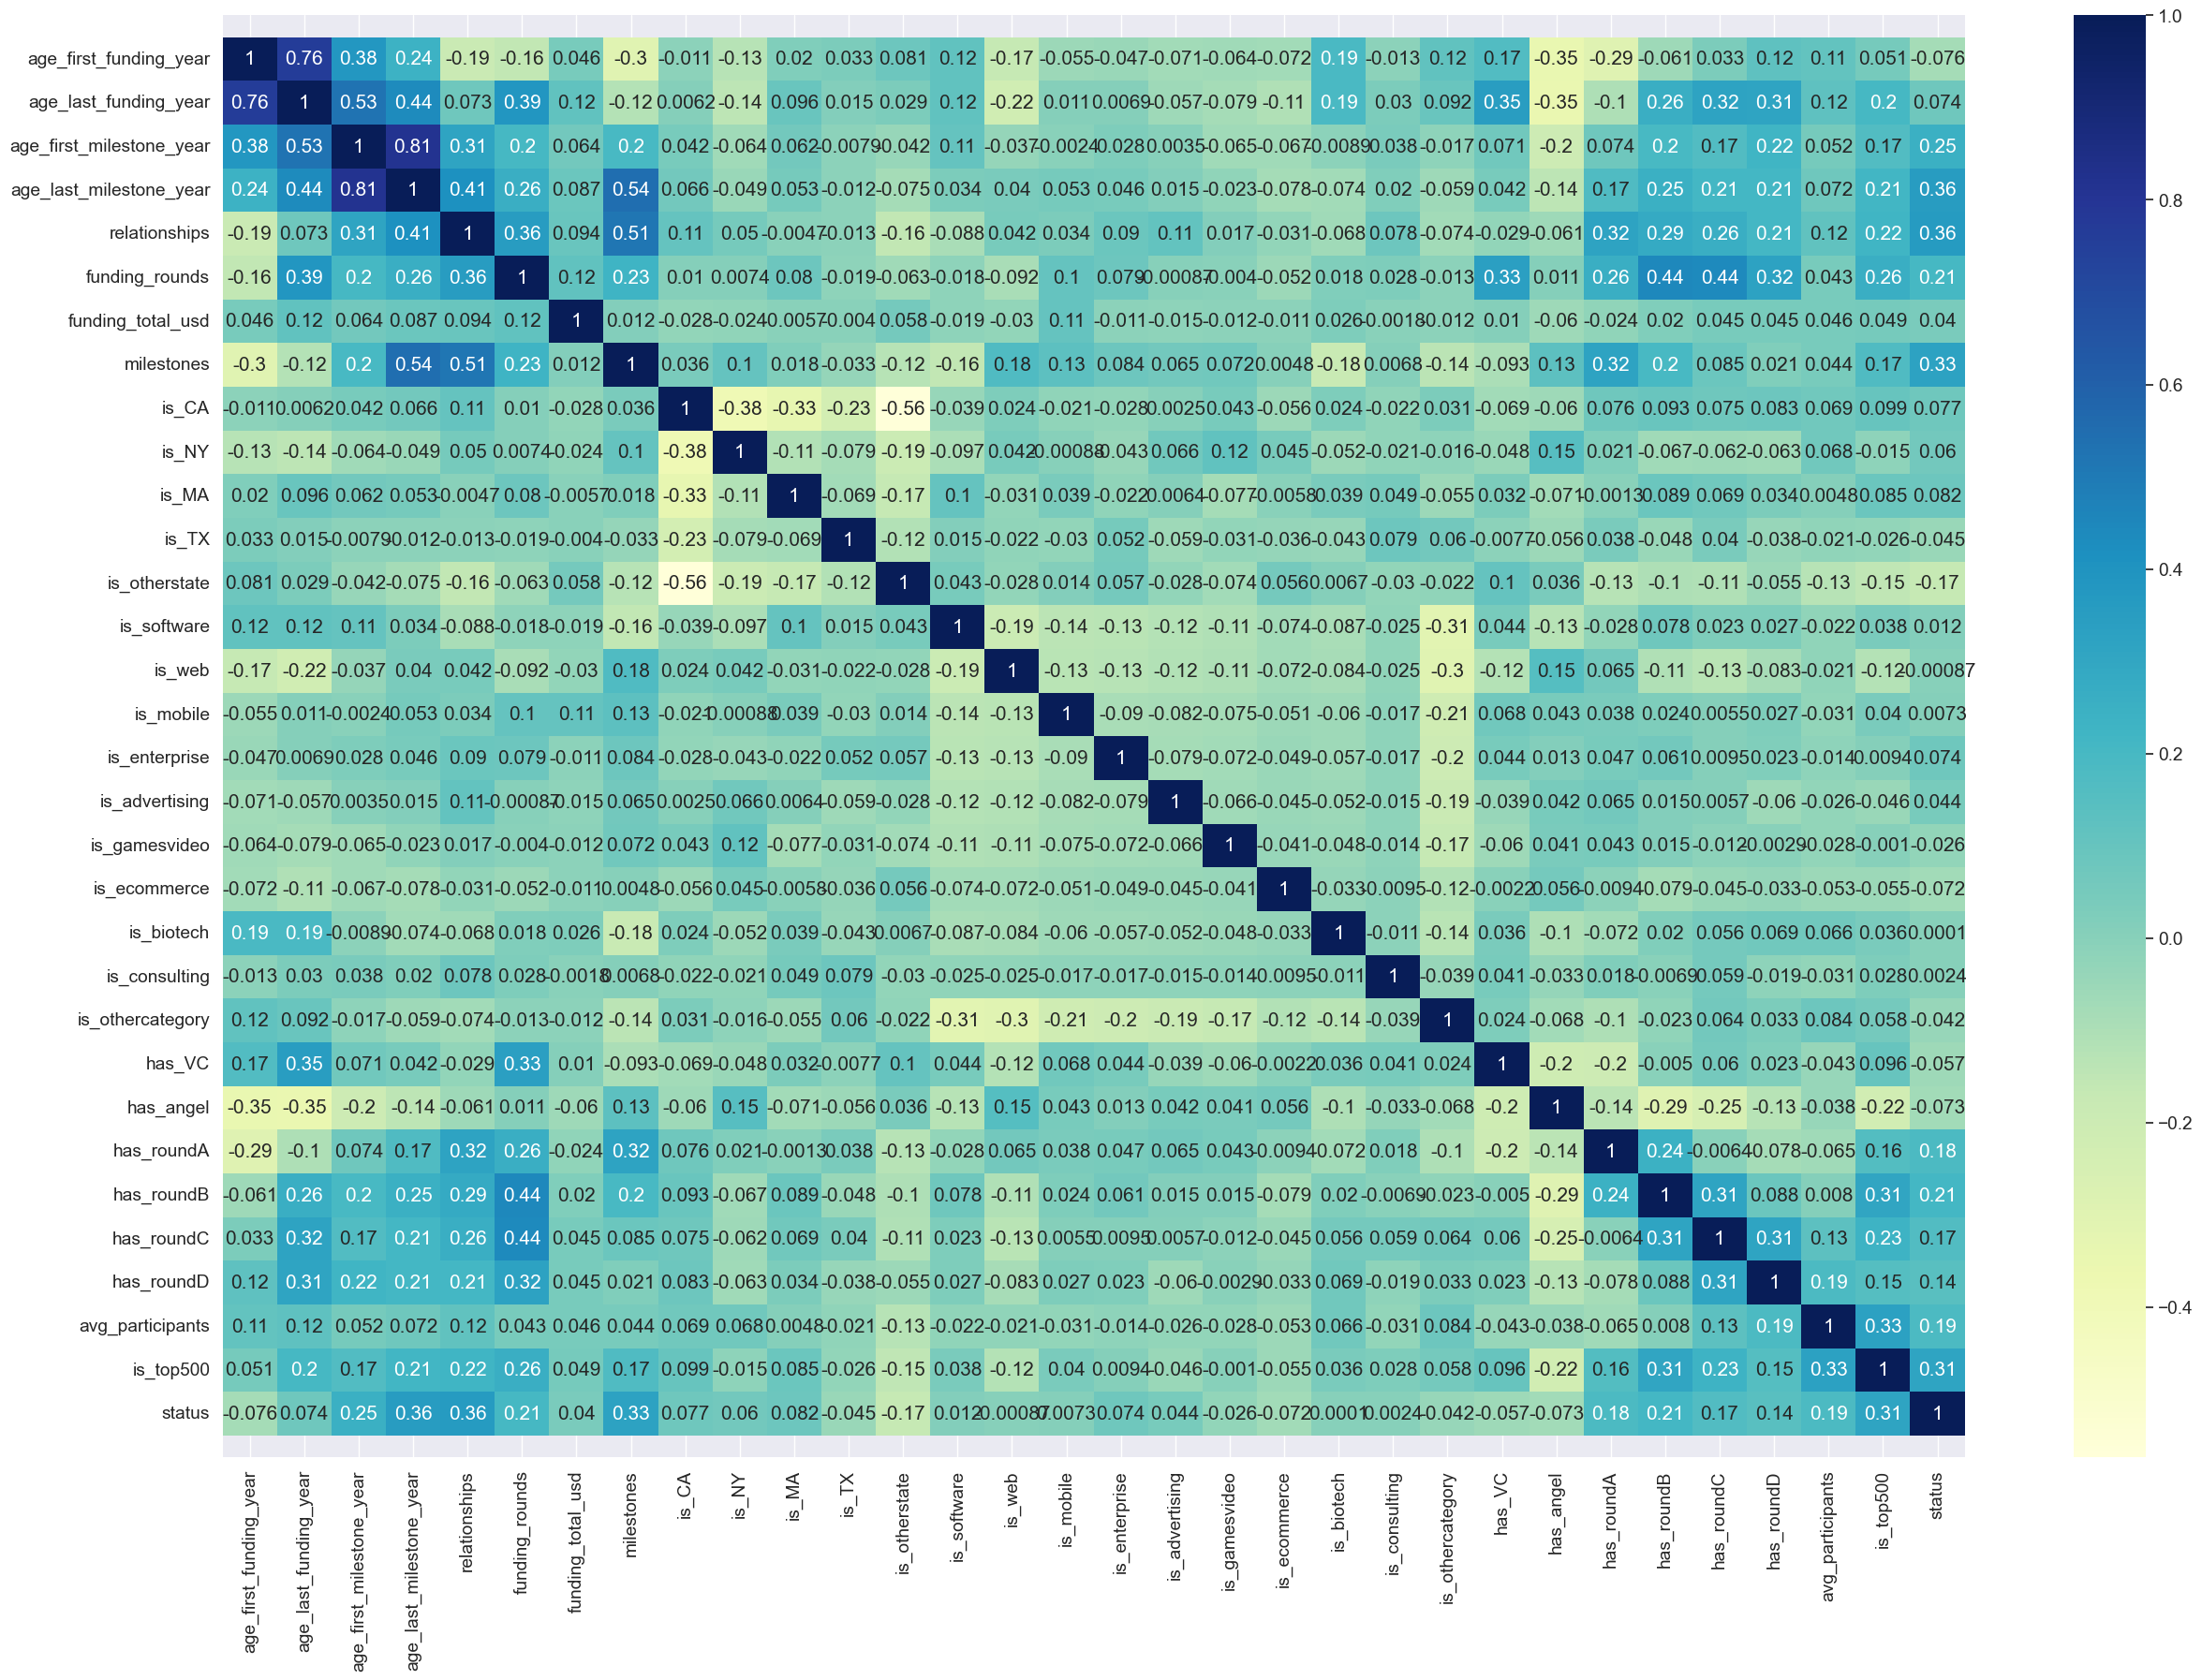

In [162]:
import matplotlib as mpl
from matplotlib import pyplot as plt
features = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','is_CA','is_NY','is_MA','is_TX','is_otherstate','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory','has_VC','has_angel','has_roundA','has_roundB','has_roundC','has_roundD','avg_participants','is_top500','status']

plt.figure(figsize=(30,20))
ax = sns.heatmap(data = data[features].corr(),cmap='YlGnBu',annot=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top - 0.5)


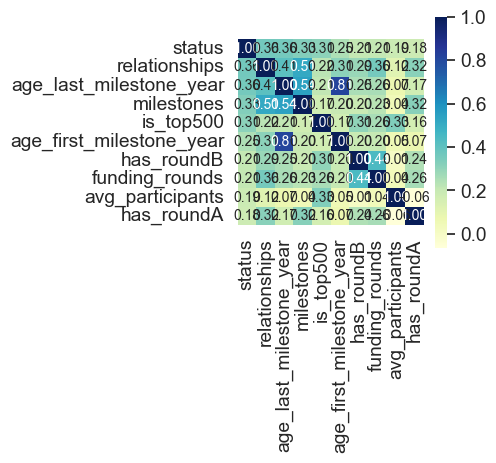

In [163]:
#number of variables for heatmap
cols = data[features].corr().nlargest(10,'status')['status'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='YlGnBu', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


## Scatter plot

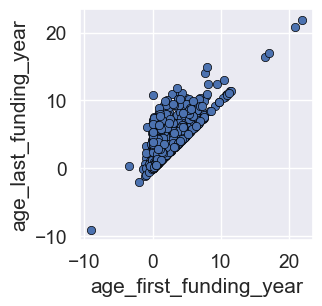

In [164]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data['age_first_funding_year'], y=data['age_last_funding_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="age_first_funding_year", ylabel="age_last_funding_year")

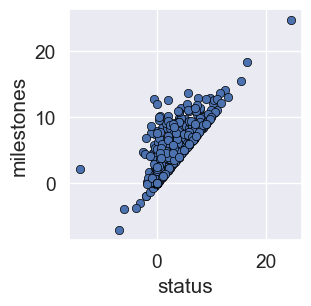

In [165]:
fig, ax = plt.subplots()
_ = plt.scatter(x=data['age_first_milestone_year'], y=data['age_last_milestone_year'], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="status", ylabel="milestones")

## Box plots

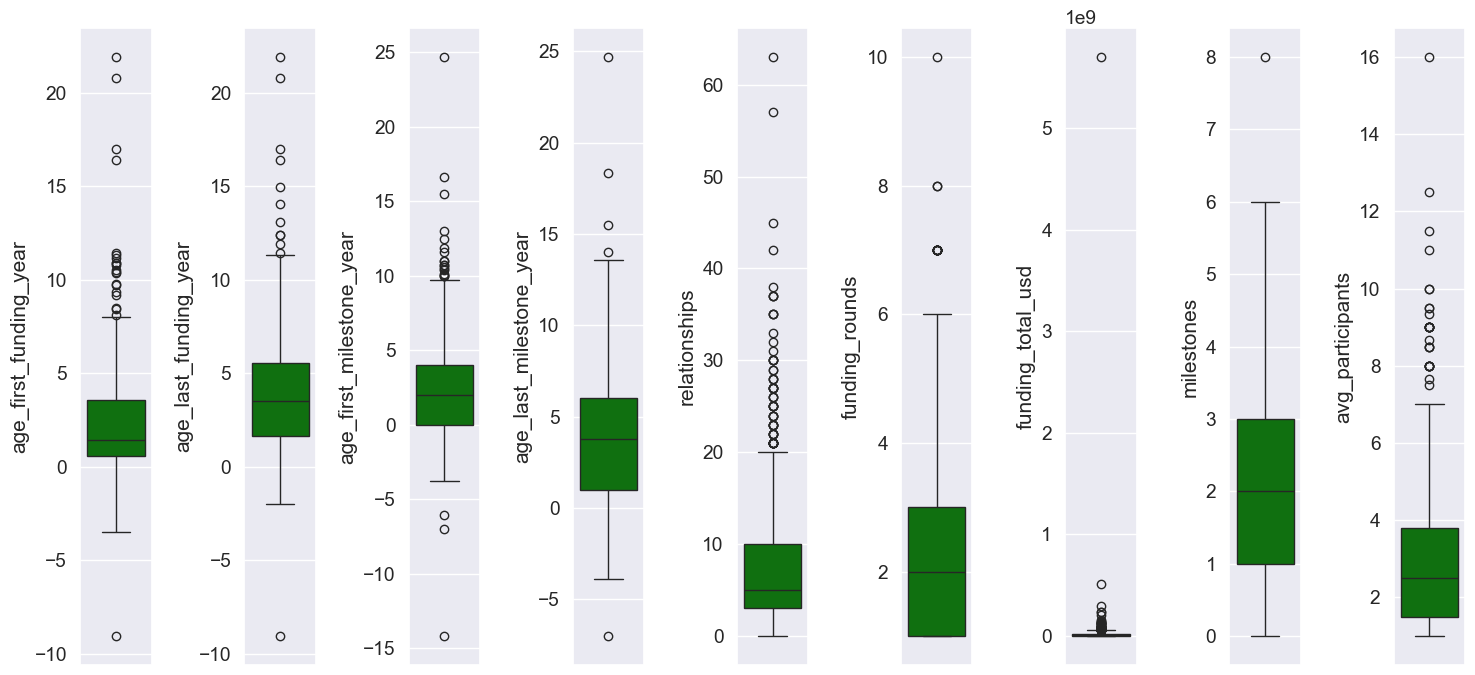

In [166]:
featuresNum = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNum)):
    plt.subplot(1, len(featuresNum), i+1)
    sns.boxplot(y=data[featuresNum[i]], color='green', orient='v')
    plt.tight_layout()

In [167]:
data["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=False)

founded_at
20:1/    563
20:6/     43
20:8/     42
20:10     38
20:5/     36
20:9/     35
20:7/     31
20:3/     30
20:4/     30
20:2/     29
20:11     23
20:12     23
Name: count, dtype: int64

In [168]:
data["founded_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

founded_at
20:1/    0.609967
20:6/    0.046587
20:8/    0.045504
20:10    0.041170
20:5/    0.039003
20:9/    0.037920
20:7/    0.033586
20:3/    0.032503
20:4/    0.032503
20:2/    0.031419
20:11    0.024919
20:12    0.024919
Name: proportion, dtype: float64

In [169]:
data["closed_at"].apply(lambda x: '20:' + x[:2]).value_counts(normalize=True)

closed_at
20:31    0.637053
20:1/    0.069339
20:6/    0.041170
20:7/    0.037920
20:2/    0.035753
20:5/    0.033586
20:8/    0.027086
20:10    0.020585
20:3/    0.020585
20:11    0.020585
20:4/    0.019502
20:12    0.018418
20:9/    0.018418
Name: proportion, dtype: float64

How many Startup are acquired or closed have?

In [170]:
df_acquired = data[(data["status"] == True)]
df_acquired.shape

(597, 48)

In [171]:
df_closed = data[(data["status"] == False)]
df_closed.shape

(326, 48)

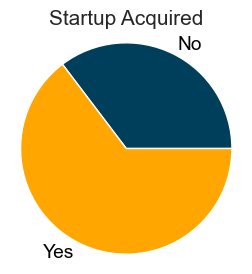

In [172]:
value_counts = data["status"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie(x=[value_counts[False], value_counts[True]], labels=['No', 'Yes'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
_ = ax.axis('equal')
_ = ax.set_title('Startup Acquired')

Which category has the largest number of startup?

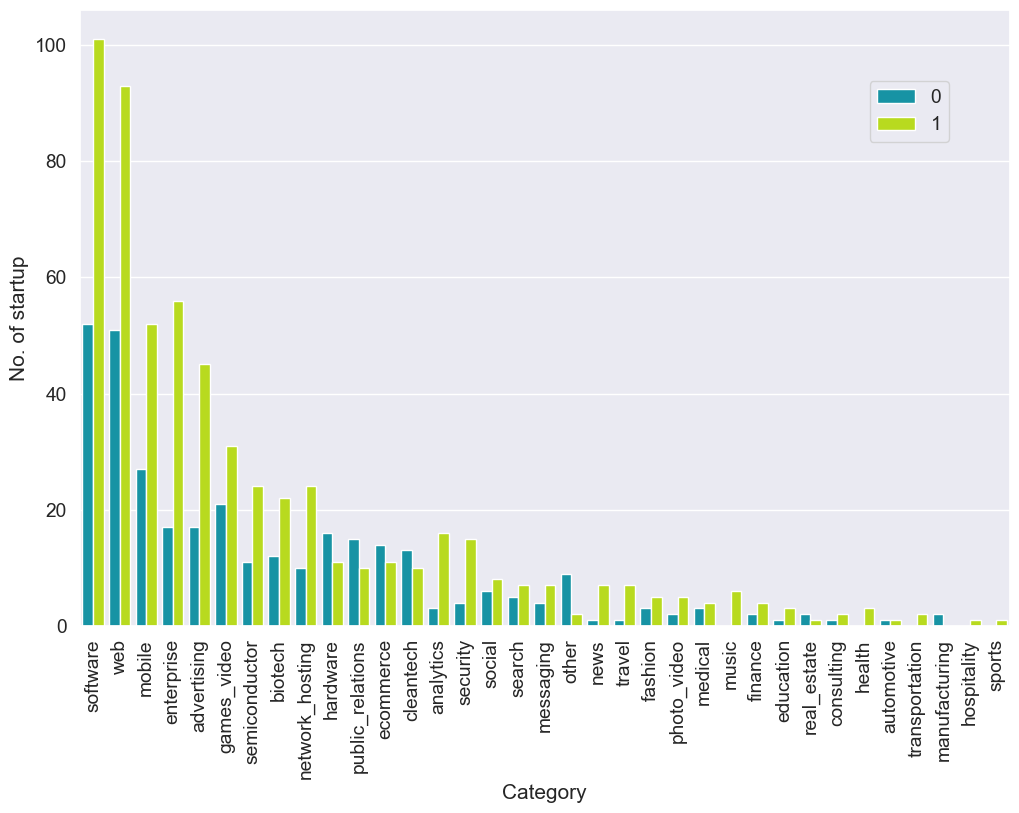

In [173]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="category_code", hue="status", data=data, palette="nipy_spectral",
              order=data.category_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

Which Category has the largest nuber success rate ?

In [174]:
data1 = data[data['status']==1].groupby(['category_code']).agg({'status':'count'}).reset_index()
data1.columns=['category_code','total_success']

data2 = data[data['status']==0].groupby(['category_code']).agg({'status':'count'}).reset_index()
data2.columns=['category_code','total_closed']

data3=data.groupby(['category_code']).agg({'status':'count'}).reset_index()
data3.columns=['category_code','total_startup']

data1= data1.merge(data2, on='category_code')
data1= data1.merge(data3, on='category_code')

data1['success_rate']= round((data1['total_success'] / data1['total_startup']) * 100,2)

most_succes_rate = data1.sort_values('success_rate', ascending=False)
most_succes_rate


,category_code,total_success,total_closed,total_startup,success_rate
17,news,7,1,8,87.50
27,travel,7,1,8,87.50
1,analytics,16,3,19,84.21
23,security,15,4,19,78.95
8,enterprise,56,17,73,76.71
7,education,3,1,4,75.00
0,advertising,45,17,62,72.58
19,photo_video,5,2,7,71.43
16,network_hosting,24,10,34,70.59
24,semiconductor,24,11,35,68.57


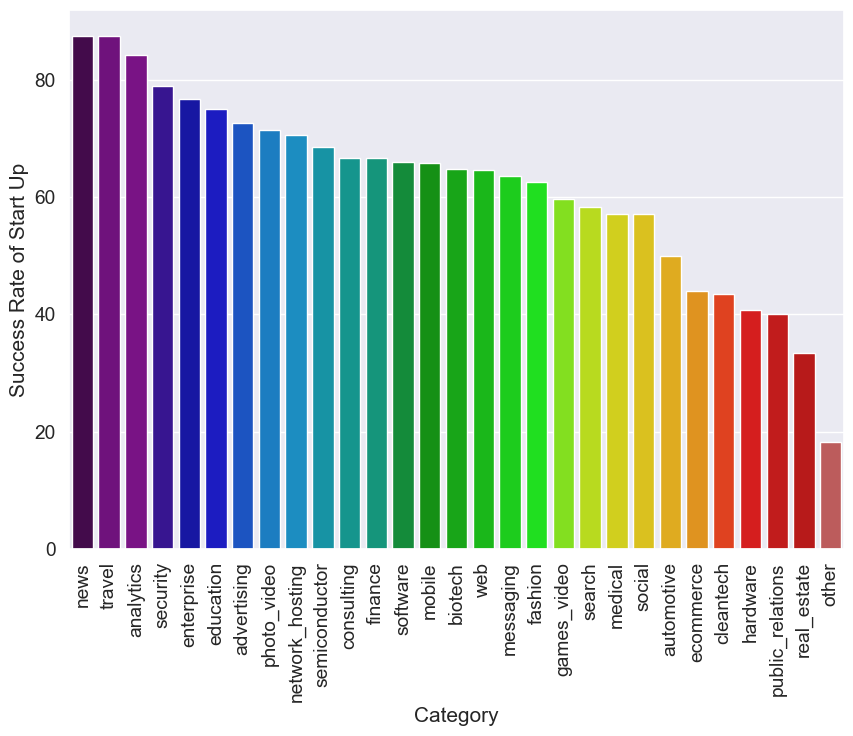

In [175]:
fig, ax = plt.subplots(figsize=(10,7))
_ = sns.barplot(x="category_code", y="success_rate", data=most_succes_rate,

                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Success Rate of Start Up")

Which category having most number of total funding?

In [176]:
funding_sorted_category = pd.pivot_table(data,
              index=['category_code'],
              values=['funding_total_usd'],
              aggfunc=['sum']
              ).reset_index()
funding_sorted_category.columns = ['category_code', 'funding_total_usd']
funding_sorted_category = funding_sorted_category.sort_values(['funding_total_usd'], ascending = False)
funding_sorted_category.head()

,category_code,funding_total_usd
18,mobile,7263750881
30,software,2657598865
34,web,1729035436
3,biotech,1723699484
8,enterprise,1338882096


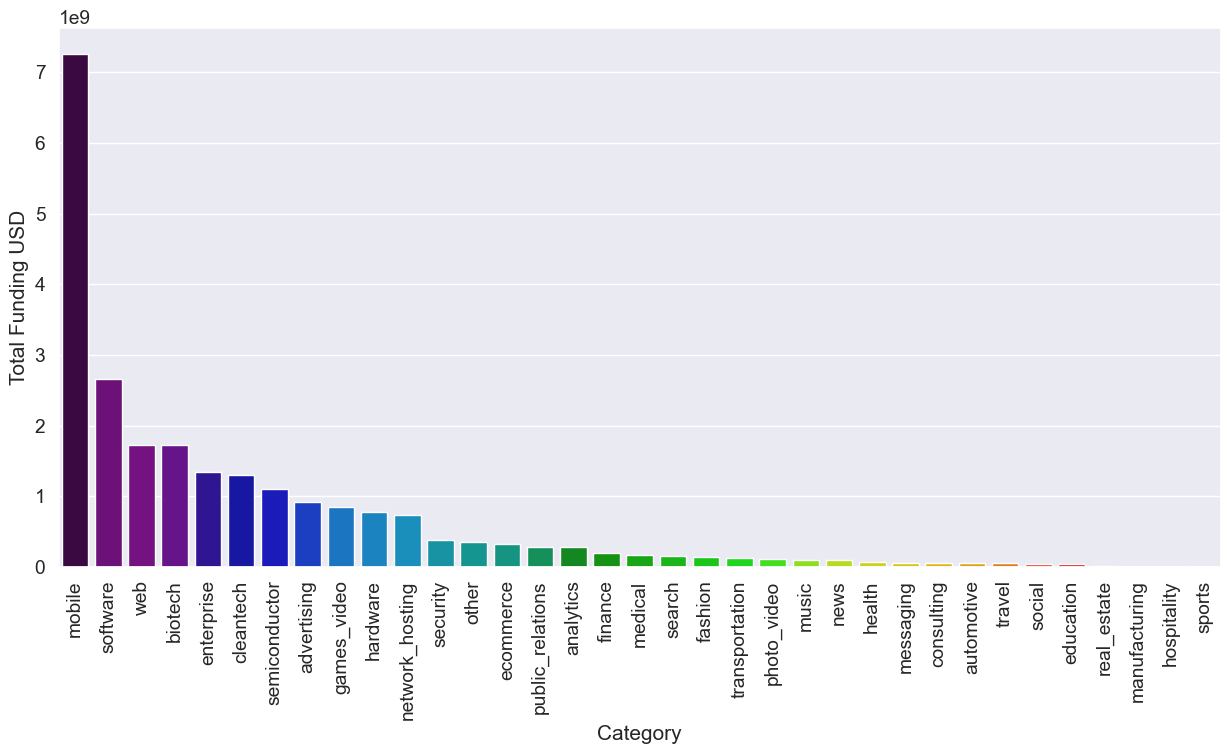

In [177]:
fig, ax = plt.subplots(figsize=(15,7))
_ = sns.barplot(x="category_code", y="funding_total_usd", data=funding_sorted_category,
                palette="nipy_spectral", ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="Total Funding USD")

Which State having most number of Startup?

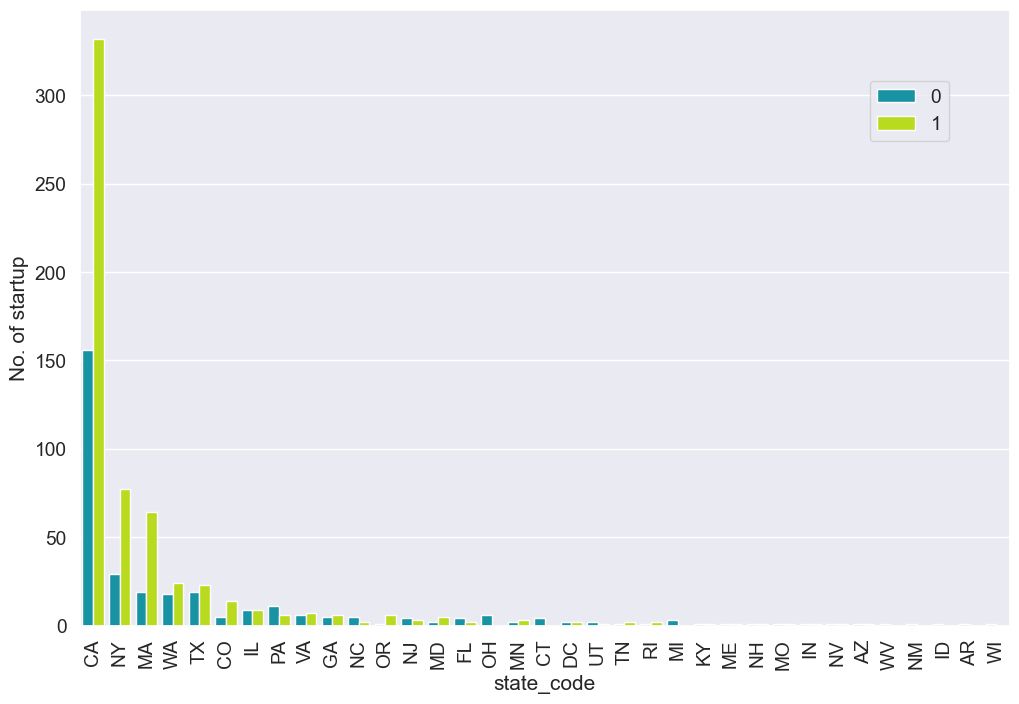

In [178]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="state_code", hue="status", data=data, palette="nipy_spectral",
              order=data.state_code.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="state_code", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

### Duplicate Values

In [179]:
#check
duplicate = data[data.duplicated()]

print("Duplicate Rows :")

Duplicate Rows :


Negative value

In [180]:
age=["age_first_funding_year","age_last_funding_year","age_first_milestone_year","age_last_milestone_year"]

for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


In [181]:
#dropping negative values
df=data.drop(data[data.age_first_funding_year<0].index)
df=data.drop(data[data.age_last_funding_year<0].index)
df=data.drop(data[data.age_first_milestone_year<0].index)
df=data.drop(data[data.age_last_milestone_year<0].index)

In [182]:
for a in range(len(age)):
    print("Is there any negative value in '{}' column  : {} ".format(age[a],(data[age[a]]<0).any()))

Is there any negative value in 'age_first_funding_year' column  : True 
Is there any negative value in 'age_last_funding_year' column  : True 
Is there any negative value in 'age_first_milestone_year' column  : True 
Is there any negative value in 'age_last_milestone_year' column  : True 


## Outliers

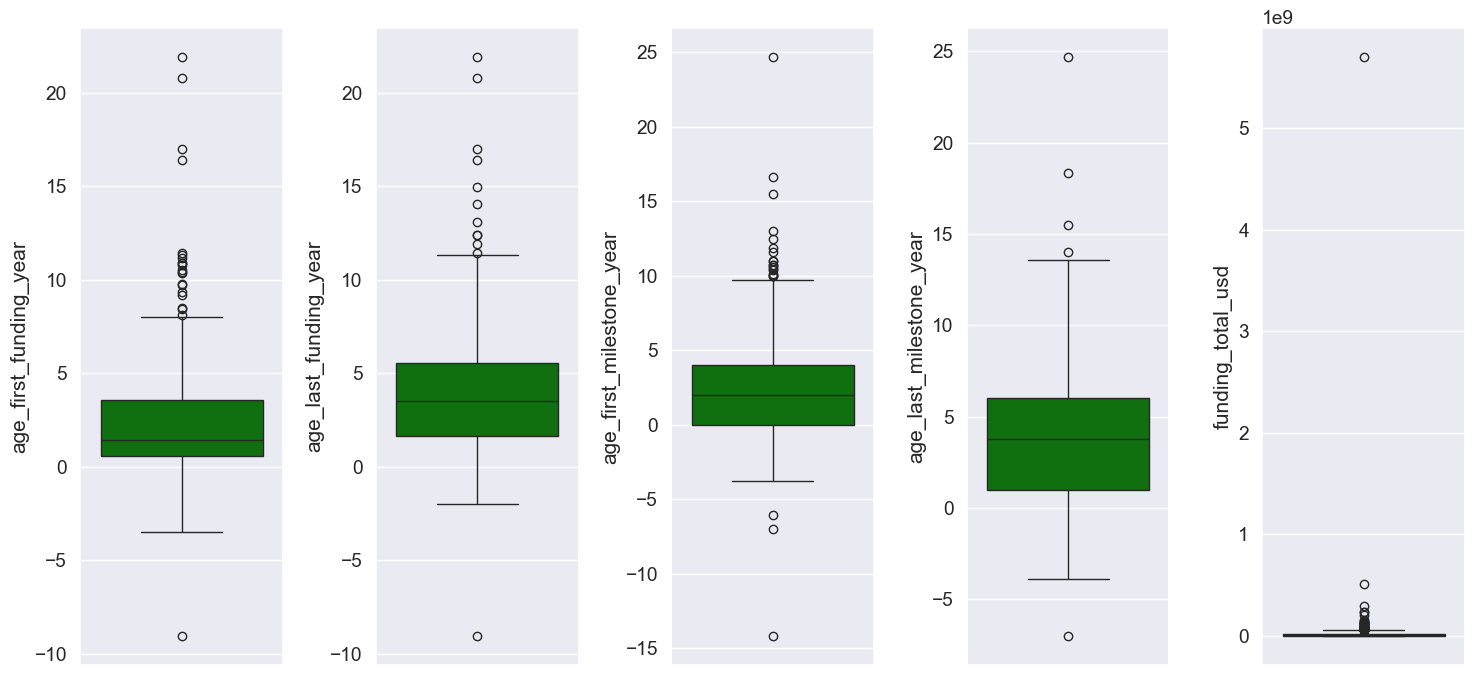

In [183]:
featuresNumfinal = ['age_first_funding_year','age_last_funding_year','age_first_milestone_year','age_last_milestone_year','funding_total_usd']

plt.figure(figsize=(15, 7))
for i in range(0, len(featuresNumfinal)):
    plt.subplot(1, len(featuresNumfinal), i+1)
    sns.boxplot(y=data[featuresNumfinal[i]], color='green', orient='v')
    plt.tight_layout()


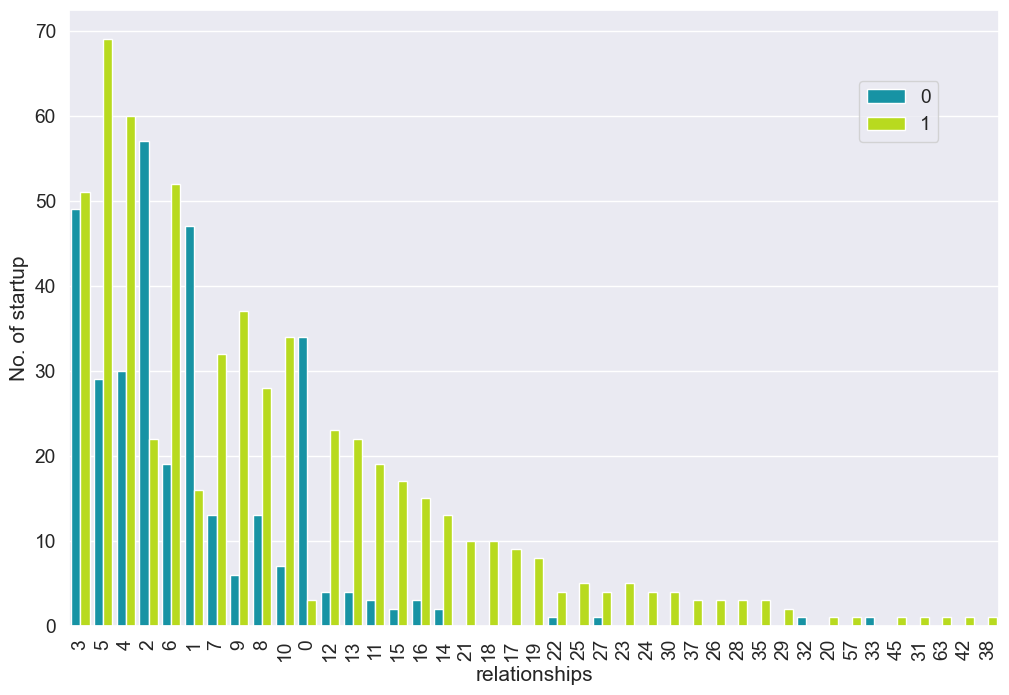

In [184]:
fig, ax = plt.subplots(figsize=(12,8))

_ = sns.countplot(x="relationships", hue="status", data=data, palette="nipy_spectral",
              order=data.relationships.value_counts().index)

_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="relationships", ylabel="No. of startup")
plt.legend(bbox_to_anchor=(0.945, 0.90))

# Create Model

In [185]:
#Check categorical
cat_feature = df.select_dtypes(include='object')
cat_feature.head()

,state_code,zip_code,id,city,Unnamed: 6,name,founded_at,closed_at,first_funding_at,last_funding_at,category_code,object_id,state
0,CA,92101,c:6669,San Diego,San Diego CA 92101,Bandsintown,1/1/2007,31/12/2013,4/1/2009,1/1/2010,music,c:6669,CA
1,CA,95032,c:16283,Los Gatos,Los Gatos CA 95032,TriCipher,1/1/2000,31/12/2013,2/14/2005,12/28/2009,enterprise,c:16283,CA
2,CA,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,31/12/2013,3/30/2010,3/30/2010,web,c:65620,CA
3,CA,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1/1/2002,31/12/2013,2/17/2005,4/25/2007,software,c:42668,CA
4,CA,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,8/1/2010,10/1/2012,8/1/2010,4/1/2012,games_video,c:65806,CA


In [186]:
#new cells
data=data.drop(['category_code','is_software','is_web','is_mobile','is_enterprise','is_advertising','is_gamesvideo','is_ecommerce','is_biotech','is_consulting','is_othercategory'],axis=1)
data=data.drop(['latitude','longitude','Unnamed: 0', 'state_code', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
        'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate',
       'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'is_top500',
       'first_funding_at','last_funding_at',],axis=1)
print(data.columns)

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants',
       'status', 'state'],
      dtype='object')


In [187]:
from sklearn.model_selection import train_test_split
# Split the data
# Input/independent variables
X = data.drop('status', axis = 1) # her we are droping the output feature as this is the target and 'X' is input features, the changes are not
                                # made inplace as we have not used 'inplace = True'
print(X.columns)
y = data['status'] # Output/Dependent variable

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'avg_participants',
       'state'],
      dtype='object')


In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [189]:
# lets print the shapes again
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (646, 10)
Shape of the y Train : (646,)
Shape of the X test : (277, 10)
Shape of the y test : (277,)


In [190]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [191]:
"""from sklearn.model_selection import GridSearchCV
#rf = RandomForestclassifier()
param_grid = {'n_estimators': [100,200,300],"max_depth' : [10,20,30],'min_samples_split" : [2,4,6],"min_samples_leaf' : [1,2,3],'bootstrap" : [True, False]}
grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 5, n_jobs = - 1, verbose = False)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search. best_params_)
#Best parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf": 2, "min_samples_split': 2, 'n_estimators': 100}"""


'from sklearn.model_selection import GridSearchCV\n#rf = RandomForestclassifier()\nparam_grid = {\'n_estimators\': [100,200,300],"max_depth\' : [10,20,30],\'min_samples_split" : [2,4,6],"min_samples_leaf\' : [1,2,3],\'bootstrap" : [True, False]}\ngrid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv = 5, n_jobs = - 1, verbose = False)\ngrid_search.fit(X_train, y_train)\nprint("Best parameters:", grid_search. best_params_)\n#Best parameters: {\'bootstrap\': False, \'max_depth\': 20, \'min_samples_leaf": 2, "min_samples_split\': 2, \'n_estimators\': 100}'

## Random Forest

Training Accuracy : 1.0
Testing Accuracy : 0.7906137184115524


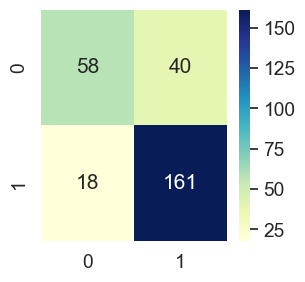

              precision    recall  f1-score   support

           0       0.76      0.59      0.67        98
           1       0.80      0.90      0.85       179

    accuracy                           0.79       277
   macro avg       0.78      0.75      0.76       277
weighted avg       0.79      0.79      0.78       277

------------------------------------------
ROC Curves              = 0.7456390377380002
Precision-Recall Curves = 0.8827091575581143


In [192]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train._get_numeric_data(),y_train)


y_pred_rf = rf.predict(X_test._get_numeric_data())

print("Training Accuracy :", rf.score(X_train._get_numeric_data(), y_train))
print("Testing Accuracy :", rf.score(X_test._get_numeric_data(), y_test))

cm = confusion_matrix(y_test, y_pred_rf)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'YlGnBu', fmt = '.8g')
plt.show()

cr = classification_report(y_test, y_pred_rf)
print(cr)


print("------------------------------------------")

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc)

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
Precision_Recall_rfs = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_rfs)

In [193]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred_rf))
print(recall_score(y_test, y_pred_rf))

0.8009950248756219
0.8994413407821229


In [194]:
from sklearn.metrics import precision_score
print(Precision_Recall_rfs)

0.8827091575581143


In [195]:
#!pip install joblib
import joblib
#import pickle
#pickle.dump(rf,open('random_forest_model.pkl','wb'))
joblib.dump(rf,'random_forest_model.pkl')
#with open('random_forest_mode.pkl','wb') as files:
 #   pickle.dump('random_forest_mode.pkl',files) 

['random_forest_model.pkl']